<a href="https://colab.research.google.com/github/shub2309/project1-/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 3**

Intern name: Shubham Naresh Jadhav

Dataset: http://bit.ly/w-data

Problem Statement:Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:

sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [8]:
#data loading
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
data.shape

(9994, 13)

In [11]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [15]:
#Calculating Cost
data['Cost'] = data['Sales'] - data['Profit']

#Calculating Profit%
data['Profit%'] = (data['Profit']/data['Cost']*100)

In [16]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056


### **Multivariate Visualizations**

Text(0.5, 1.0, 'Correlation between variables')

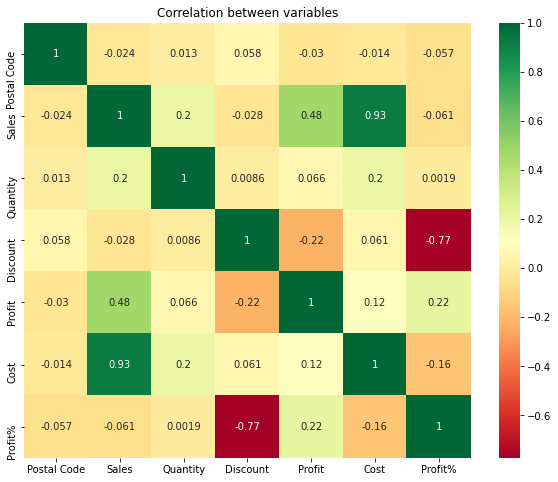

In [17]:
# correlation matrix and heatmap
datacorr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(datacorr, annot=True, cmap='RdYlGn')
plt.title('Correlation between variables')



Finding modes of shipping products and observing which is more preferred mode of shipping?

In [18]:
shipmodetypes = data.groupby('Ship Mode')
for i,df in shipmodetypes:
    print(i)

First Class
Same Day
Second Class
Standard Class


In [19]:
data.groupby('Ship Mode').groups

{'First Class': [35, 36, 44, 45, 55, 56, 57, 58, 59, 60, 61, 69, 75, 76, 77, 79, 80, 84, 97, 119, 120, 121, 122, 123, 130, 131, 132, 151, 152, 153, 154, 155, 160, 189, 190, 191, 192, 193, 201, 202, 219, 220, 221, 222, 223, 224, 252, 253, 271, 272, 273, 274, 275, 293, 294, 295, 296, 297, 308, 316, 326, 327, 328, 329, 330, 349, 350, 351, 352, 353, 359, 360, 376, 381, 382, 388, 402, 421, 427, 433, 484, 485, 486, 487, 510, 511, 512, 522, 523, 524, 540, 541, 546, 547, 552, 563, 564, 565, 598, 610, ...], 'Same Day': [366, 367, 368, 369, 657, 658, 664, 683, 684, 746, 747, 792, 813, 814, 882, 959, 987, 1001, 1002, 1003, 1086, 1135, 1146, 1147, 1148, 1149, 1150, 1166, 1193, 1194, 1195, 1196, 1234, 1235, 1236, 1237, 1273, 1274, 1275, 1276, 1355, 1356, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1437, 1438, 1459, 1467, 1473, 1508, 1562, 1563, 1564, 1568, 1593, 1630, 1631, 1632, 1633, 1634, 1650, 1651, 1704, 1728, 1729, 1815, 1816, 1830, 1831, 1847, 1848, 1862, 1865, 1880, 18

In [20]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Ship Mode Preference')

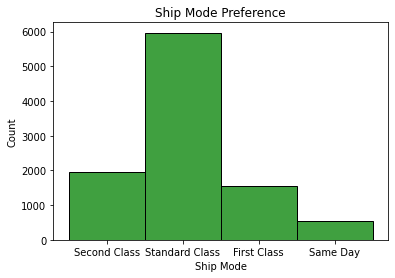

In [21]:

sns.histplot(x=data['Ship Mode'], color='g')
plt.title('Ship Mode Preference')


Customer Segments

In [22]:

segmenttypes = data.groupby('Segment')
for i,df in segmenttypes:
    print(i)

Consumer
Corporate
Home Office


In [23]:

data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Customer Segments')

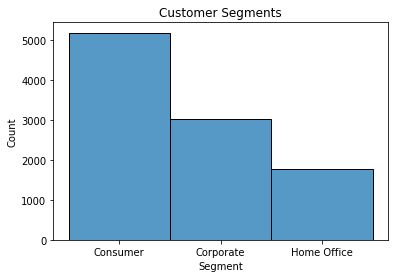

In [24]:
sns.histplot(x=data['Segment'])
plt.title('Customer Segments')

Category-wise Analysis

In [25]:

cat = data.groupby('Category')
for i,df in cat:
    print(i)

Furniture
Office Supplies
Technology


Text(0.5, 1.0, 'Categories of Products')

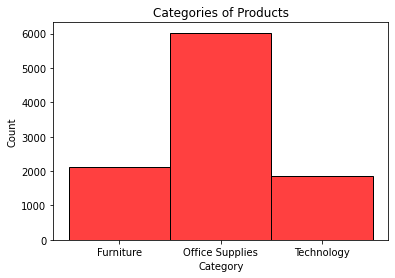

In [26]:

sns.histplot(x=data['Category'] ,color='red')
plt.title('Categories of Products')

Text(0.5, 1.0, 'Region-wise Ordered Product Categories')

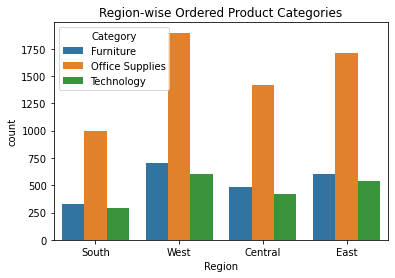

In [27]:
sns.countplot(x=data['Region'], hue=data['Category'])
plt.title('Region-wise Ordered Product Categories')

South region of the US orders less technology products and more office supplies, west orders more than any other region

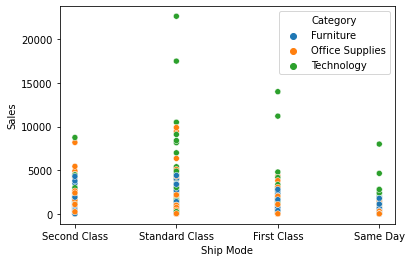

In [28]:
sns.scatterplot(x=data['Ship Mode'], y=data['Sales'], hue=data['Category'])

                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330


Text(0.5, 1.0, 'Category-wise Profit and Sale')

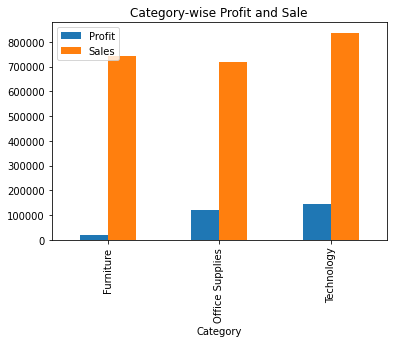

In [29]:
ds =data.groupby('Category')['Profit','Sales'].agg('sum')
print(ds)
ds.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise Profit and Sale')

Sub-Category-wise Analysis

In [30]:
subcatarr = []
subcat = data.groupby('Sub-Category')
for i,df in subcat:
    print(i)
    subcatarr.append(i)

Accessories
Appliances
Art
Binders
Bookcases
Chairs
Copiers
Envelopes
Fasteners
Furnishings
Labels
Machines
Paper
Phones
Storage
Supplies
Tables


Text(0.5, 1.0, 'Quantity of different Sub-Categories Ordered')

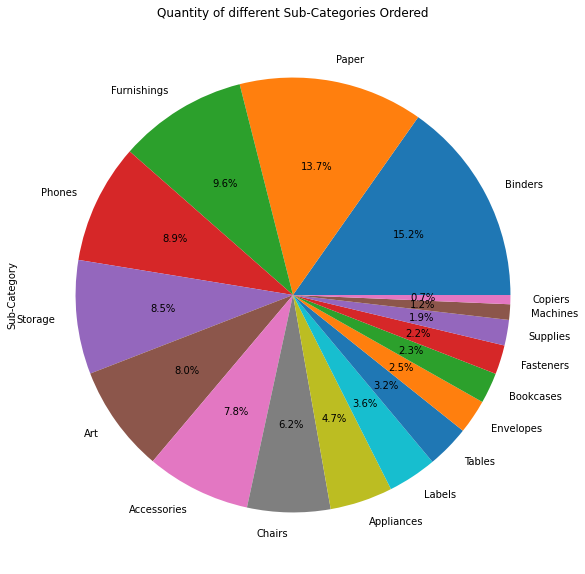

In [31]:

plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Quantity of different Sub-Categories Ordered')


Region-wise Analysis

In [32]:
regions = data.groupby('Region')
for i,df in regions:
    print(i)

Central
East
South
West


Text(0.5, 1.0, 'Region-wise Profit and Sales')

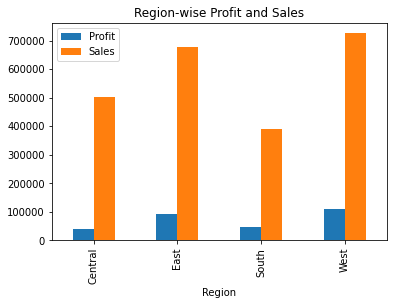

In [33]:

rw =data.groupby('Region')['Profit','Sales'].agg('sum')
rw.plot.bar()
plt.legend(loc='upper left')
plt.title('Region-wise Profit and Sales')

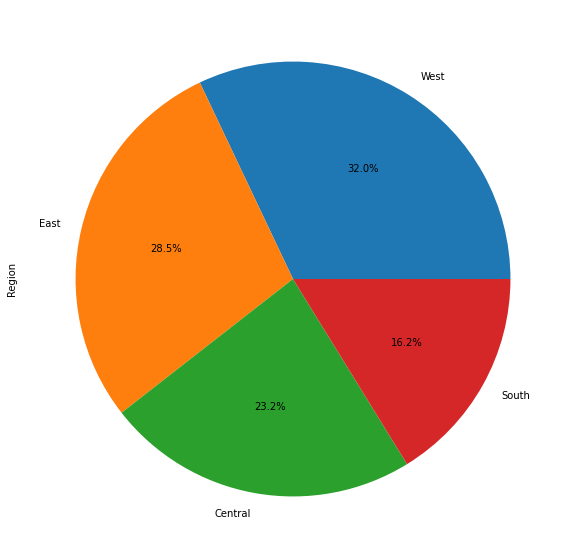

In [34]:
plt.figure(figsize=(10,10))
data['Region'].value_counts().plot.pie(autopct="%1.1f%%")

City-wise Analysis

In [35]:

city = []
cities = data.groupby('City')
for i,df in cities:
    city.append(i)

In [36]:
city

['Aberdeen',
 'Abilene',
 'Akron',
 'Albuquerque',
 'Alexandria',
 'Allen',
 'Allentown',
 'Altoona',
 'Amarillo',
 'Anaheim',
 'Andover',
 'Ann Arbor',
 'Antioch',
 'Apopka',
 'Apple Valley',
 'Appleton',
 'Arlington',
 'Arlington Heights',
 'Arvada',
 'Asheville',
 'Athens',
 'Atlanta',
 'Atlantic City',
 'Auburn',
 'Aurora',
 'Austin',
 'Avondale',
 'Bakersfield',
 'Baltimore',
 'Bangor',
 'Bartlett',
 'Bayonne',
 'Baytown',
 'Beaumont',
 'Bedford',
 'Belleville',
 'Bellevue',
 'Bellingham',
 'Bethlehem',
 'Beverly',
 'Billings',
 'Bloomington',
 'Boca Raton',
 'Boise',
 'Bolingbrook',
 'Bossier City',
 'Bowling Green',
 'Boynton Beach',
 'Bozeman',
 'Brentwood',
 'Bridgeton',
 'Bristol',
 'Broken Arrow',
 'Broomfield',
 'Brownsville',
 'Bryan',
 'Buffalo',
 'Buffalo Grove',
 'Bullhead City',
 'Burbank',
 'Burlington',
 'Caldwell',
 'Camarillo',
 'Cambridge',
 'Canton',
 'Carlsbad',
 'Carol Stream',
 'Carrollton',
 'Cary',
 'Cedar Hill',
 'Cedar Rapids',
 'Champaign',
 'Chandler',
 

In [37]:

len(city)

531

In [38]:
data['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
San Luis Obispo      1
Conway               1
Missouri City        1
Waukesha             1
Ormond Beach         1
Name: City, Length: 531, dtype: int64

In [39]:

data['City'].value_counts().min()

1

In [40]:
data['City'].value_counts().max()

915

In [41]:

data[data['City']=='New York City']

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
53,Standard Class,Corporate,United States,New York City,New York,10024,East,Office Supplies,Fasteners,15.260,7,0.0,6.2566,9.0034,69.491525
54,Standard Class,Corporate,United States,New York City,New York,10024,East,Technology,Phones,1029.950,5,0.0,298.6855,731.2645,40.845070
70,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,4.616,1,0.2,1.7310,2.8850,60.000000
96,Second Class,Home Office,United States,New York City,New York,10009,East,Furniture,Furnishings,96.530,7,0.0,40.5426,55.9874,72.413793
110,Standard Class,Corporate,United States,New York City,New York,10035,East,Furniture,Furnishings,41.960,2,0.0,10.9096,31.0504,35.135135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,First Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,199.980,2,0.0,53.9946,145.9854,36.986301
9927,First Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,83.920,4,0.0,20.1408,63.7792,31.578947
9938,Standard Class,Corporate,United States,New York City,New York,10009,East,Furniture,Furnishings,60.350,5,0.0,19.9155,40.4345,49.253731
9939,Standard Class,Corporate,United States,New York City,New York,10009,East,Office Supplies,Supplies,35.520,4,0.0,9.9456,25.5744,38.888889
